# Phase 1: Data Preparation

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
bank_data = pd.read_csv('C:/Users/NayeemIslam/Downloads/project_datasets/bank_marketing/bank.csv')



In [2]:
# Step 3: Check for missing values
missing_values = bank_data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [3]:
# Step 4: Calculate statistics for numeric attributes
numeric_attributes = bank_data.select_dtypes(include=['int64', 'float64'])
numeric_stats = numeric_attributes.describe()
print("Numeric Attribute Statistics:\n", numeric_stats)



Numeric Attribute Statistics:
                age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000   

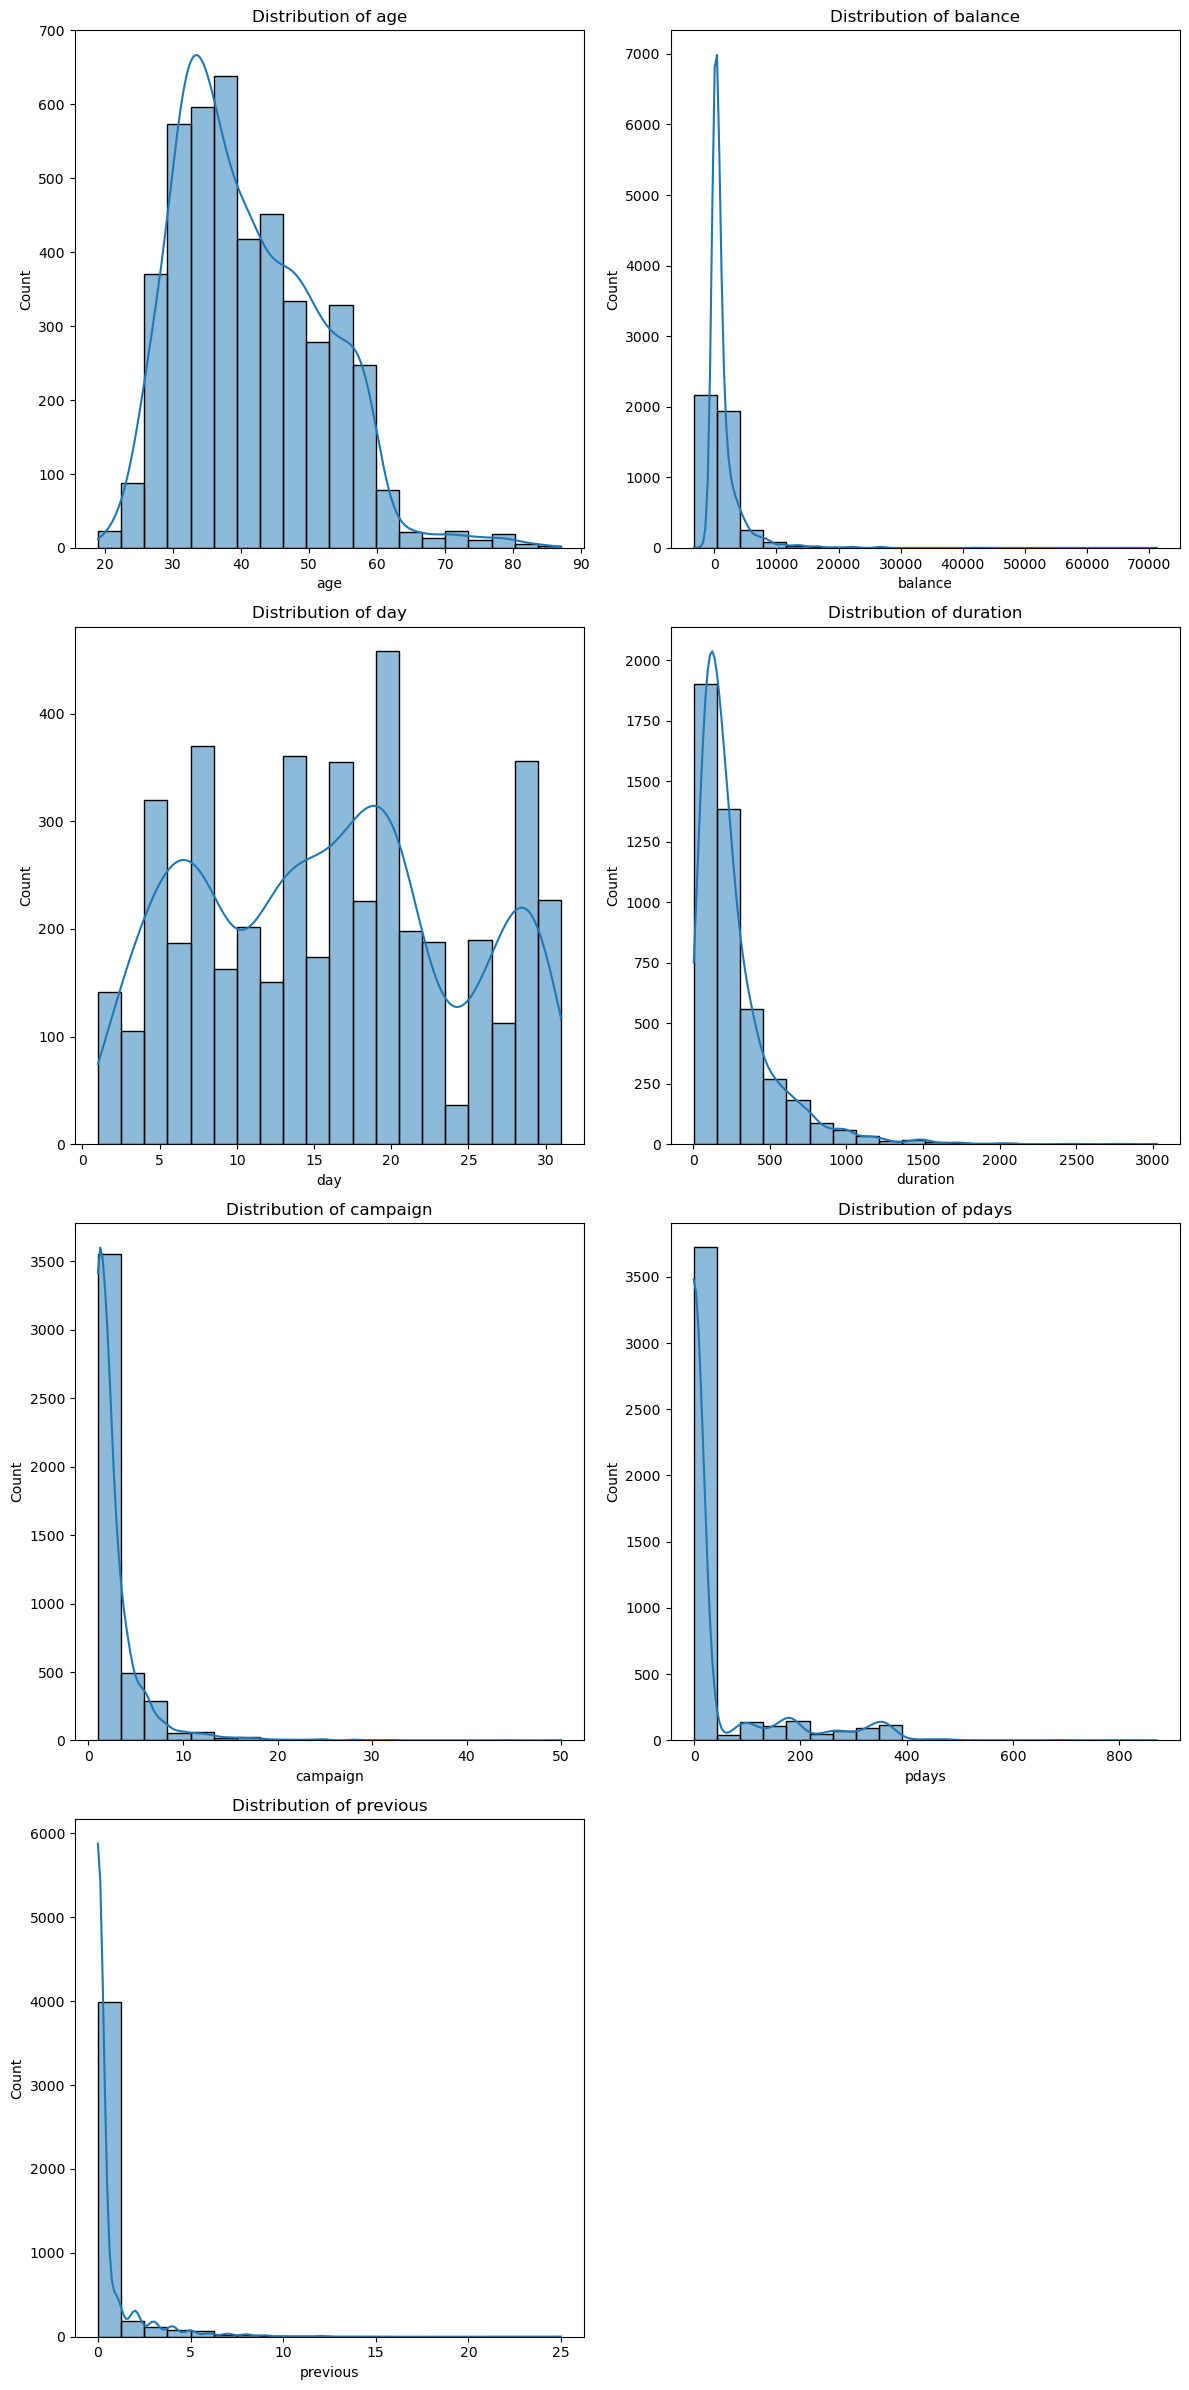

In [4]:
# Step 5: Visualize and analyze distributions of numeric attributes
num_numeric_columns = numeric_attributes.shape[1]
num_rows = (num_numeric_columns + 1) // 2
plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numeric_attributes.columns, 1):
    plt.subplot(num_rows, 2, idx)
    sns.histplot(data=numeric_attributes, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


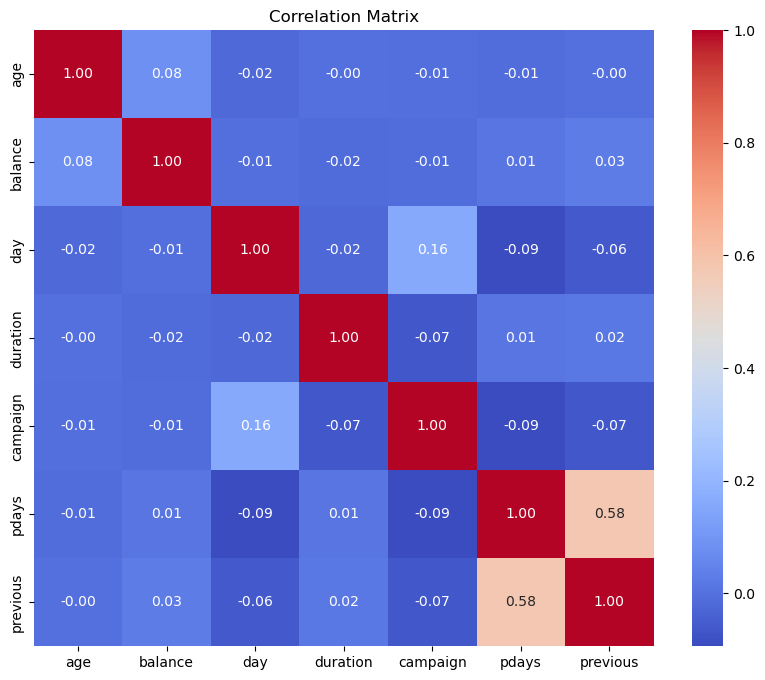

In [5]:
# Step 6: Identify correlations between attributes
correlation_matrix = numeric_attributes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [6]:
# Step 7: Check for class imbalance
class_counts = bank_data['y'].value_counts()
print("Class Counts:\n", class_counts)



Class Counts:
 no     4000
yes     521
Name: y, dtype: int64


In [7]:
# Step 8: Handle categorical attributes
categorical_attributes = bank_data.select_dtypes(include=['object'])
categorical_counts = categorical_attributes.nunique()
print("Categorical Attribute Value Counts:\n", categorical_counts)


Categorical Attribute Value Counts:
 job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64


# Phase 2: Predictive Modeling (Classification)

In [8]:
# Step 1: Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [9]:
data= bank_data

# Separate features (X) and target (y)
X = data.drop(columns=['y'])  # Replace 'target_column' with the actual target column name
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Step 2: Encode categorical features
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])


In [11]:

# Step 3: Initialize and train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [12]:
# Step 4: Initialize and train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [13]:
# Step 5: Predict using the Decision Tree classifier
y_pred_decision_tree = decision_tree.predict(X_test)



In [14]:

# Step 6: Initialize and train a Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)


GaussianNB()

In [15]:

# Step 7: Predict using the Naive Bayes classifier
y_pred_naive_bayes = naive_bayes.predict(X_test)


In [16]:
# Step 8: Evaluate the performance of the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)

evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_naive_bayes, "Naive Bayes")

Model: Decision Tree
Accuracy: 0.87
Confusion Matrix:
[[743  64]
 [ 52  46]]
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.92      0.93       807
         yes       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905

Model: Naive Bayes
Accuracy: 0.83
Confusion Matrix:
[[709  98]
 [ 54  44]]
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.88      0.90       807
         yes       0.31      0.45      0.37        98

    accuracy                           0.83       905
   macro avg       0.62      0.66      0.63       905
weighted avg       0.86      0.83      0.85       905



# Phase 3: Comparing Classification Models

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 4: Initialize and train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)



In [18]:
# Step 5: Initialize and train a Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)



In [19]:
# Step 6: Compare the models
def compare_models(y_true, y_pred_1, y_pred_2, model1_name, model2_name):
    accuracy_1 = accuracy_score(y_true, y_pred_1)
    precision_1 = precision_score(y_true, y_pred_1, pos_label='yes')
    recall_1 = recall_score(y_true, y_pred_1, pos_label='yes')
    f1_1 = f1_score(y_true, y_pred_1, pos_label='yes')
    
    accuracy_2 = accuracy_score(y_true, y_pred_2)
    precision_2 = precision_score(y_true, y_pred_2, pos_label='yes')
    recall_2 = recall_score(y_true, y_pred_2, pos_label='yes')
    f1_2 = f1_score(y_true, y_pred_2, pos_label='yes')
    
    comparison_results = {
        'accuracy_1': accuracy_1, 'precision_1': precision_1, 'recall_1': recall_1, 'f1_1': f1_1,
        'accuracy_2': accuracy_2, 'precision_2': precision_2, 'recall_2': recall_2, 'f1_2': f1_2
    }
    
    print(f"Model: {model1_name}")
    print(f"Accuracy: {accuracy_1:.2f}, Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1-Score: {f1_1:.2f}")
    
    print(f"Model: {model2_name}")
    print(f"Accuracy: {accuracy_2:.2f}, Precision: {precision_2:.2f}, Recall: {recall_2:.2f}, F1-Score: {f1_2:.2f}")
    
    return comparison_results


In [20]:
compare_models(y_test, y_pred_decision_tree, y_pred_naive_bayes, "Decision Tree", "Naive Bayes")


Model: Decision Tree
Accuracy: 0.87, Precision: 0.42, Recall: 0.47, F1-Score: 0.44
Model: Naive Bayes
Accuracy: 0.83, Precision: 0.31, Recall: 0.45, F1-Score: 0.37


{'accuracy_1': 0.8718232044198895,
 'precision_1': 0.41818181818181815,
 'recall_1': 0.46938775510204084,
 'f1_1': 0.4423076923076923,
 'accuracy_2': 0.8320441988950277,
 'precision_2': 0.30985915492957744,
 'recall_2': 0.4489795918367347,
 'f1_2': 0.36666666666666664}

# Phase 4: Conclusion and Recommendations

In [21]:
# Print the summary of the analysis and comparison
print("Phase 4: Conclusion and Recommendations")
print("--------------------------------------")

# Compare the models and get metrics
comparison_results = compare_models(y_test, y_pred_decision_tree, y_pred_naive_bayes, "Decision Tree", "Naive Bayes")
accuracy_1, precision_1, recall_1, f1_1, accuracy_2, precision_2, recall_2, f1_2 = (
    comparison_results['accuracy_1'], comparison_results['precision_1'], comparison_results['recall_1'], comparison_results['f1_1'],
    comparison_results['accuracy_2'], comparison_results['precision_2'], comparison_results['recall_2'], comparison_results['f1_2']
)

# Conclusion based on model comparison
print("Conclusion:")
print("------------")
print("After analyzing and comparing the performance of the Decision Tree and Naive Bayes models, we can draw the following conclusions:")

if accuracy_1 > accuracy_2:
    print("The Decision Tree model has a higher accuracy than the Naive Bayes model.")
else:
    print("The Naive Bayes model has a higher accuracy than the Decision Tree model.")

if f1_1 > f1_2:
    print("The Decision Tree model has a higher F1-score than the Naive Bayes model.")
else:
    print("The Naive Bayes model has a higher F1-score than the Decision Tree model.")

# Recommendations
print("\nRecommendations:")
print("-----------------")
print("Based on the analysis, we can provide the following recommendations:")

if accuracy_1 > accuracy_2:
    print("- Consider using the Decision Tree model for predicting future outcomes due to its higher accuracy.")
else:
    print("- Consider using the Naive Bayes model for predicting future outcomes due to its higher accuracy.")

print("- Further exploration and feature engineering might help improve the models' performance.")
print("- Collecting more data or investigating additional features could lead to better predictions.")
print("- Regular model evaluation and updates are recommended to ensure continued accuracy.")

# Overall summary
print("\nOverall, the analysis and modeling process provides insights into the dataset and offers predictive models that can assist in making informed decisions.")


Phase 4: Conclusion and Recommendations
--------------------------------------
Model: Decision Tree
Accuracy: 0.87, Precision: 0.42, Recall: 0.47, F1-Score: 0.44
Model: Naive Bayes
Accuracy: 0.83, Precision: 0.31, Recall: 0.45, F1-Score: 0.37
Conclusion:
------------
After analyzing and comparing the performance of the Decision Tree and Naive Bayes models, we can draw the following conclusions:
The Decision Tree model has a higher accuracy than the Naive Bayes model.
The Decision Tree model has a higher F1-score than the Naive Bayes model.

Recommendations:
-----------------
Based on the analysis, we can provide the following recommendations:
- Consider using the Decision Tree model for predicting future outcomes due to its higher accuracy.
- Further exploration and feature engineering might help improve the models' performance.
- Collecting more data or investigating additional features could lead to better predictions.
- Regular model evaluation and updates are recommended to ensure 